# Sistemas Dinâmicos e Controlo - Projeto

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import StateSpace, lsim, step

In [2]:
m = 1.5 * 10 ** -1 # motorcycle mass
g = 9.81 # gravity
h = 8.0 * 10 ** -1 # height of center of mass
I = 1.5 * 10 ** -2 # moment of inertia

### Ex. 1

$$ I \ddot{\theta} = mgh \cdot sin(\theta) + \tau $$

At small angles $ sin(\theta) \approx \theta $.

$$ I \ddot{\theta} = mgh \cdot \theta + \tau $$

$$ \ddot{\theta} = \frac{mgh \cdot \theta}{I} + \frac{\tau}{I} $$

$$ x = \begin{bmatrix} 
 \theta \\
 \dot{\theta} \\
\end{bmatrix} \Leftrightarrow \dot{x} = \begin{bmatrix} 
 \dot{\theta} \\
 \ddot{\theta} \\
\end{bmatrix} \Leftrightarrow \dot{x} = \begin{bmatrix} 
 \dot{\theta} \\
 \frac{mgh}{I}\cdot \theta + \frac{\tau}{I} \\
\end{bmatrix} \Leftrightarrow \dot{x} = \begin{bmatrix} 
 \dot{\theta} \\
 \frac{mgh}{I}\cdot \theta \\
\end{bmatrix} + \begin{bmatrix}
0 \\
\frac{\tau}{I}
\end{bmatrix} u \Leftrightarrow \dot{x} = \begin{bmatrix} 
 0 & 1 \\
 \frac{mgh}{I}  & 0\\
\end{bmatrix} \begin{bmatrix}
 \theta \\
 \dot{\theta}
\end{bmatrix} + \begin{bmatrix}
0 \\
\frac{\tau}{I}
\end{bmatrix} u $$

Since $ u = \tau $:

$$
\dot{x} = \begin{bmatrix} 
 0 & 1 \\
 \frac{mgh}{I}  & 0\\
\end{bmatrix} \begin{bmatrix}
 \theta \\
 \dot{\theta}
\end{bmatrix} + \begin{bmatrix}
0 \\
I
\end{bmatrix} u $$

$$ y = C \cdot x \Leftrightarrow y = C \cdot \begin{bmatrix}
\theta \\ \dot \theta
\end{bmatrix} \Leftrightarrow y = \begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix} \cdot \begin{bmatrix}
\theta \\ \dot \theta
\end{bmatrix} \Leftrightarrow C = \begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix} $$
 


In [3]:
A = [[0,1],[m*g*h/I,0]]
B = [0, 1/I]
C = [[1,0],[0,1]]
print("Matrix A: ", A)
print("Matrix B: ", B)
print("Matrix C: ", C)

Matrix A:  [[0, 1], [78.48000000000002, 0]]
Matrix B:  [0, 66.66666666666667]
Matrix C:  [[1, 0], [0, 1]]


### Ex.2

Controlability Matrix:

$$ Q = \begin{bmatrix} B & AB & A^{2}B & ... & A^{n-1}B \end{bmatrix} $$

$ |Q| = 0 $, the system is controllable, $ |Q| \neq 0 $, the system is not controllable.

In [4]:
n = 2
AB = np.dot(A,B)
Q = [B, AB]

print("Controlability Matrix: ", Q)
print("Determinant: ", np.linalg.det(Q))
print("Rank: ", np.linalg.matrix_rank(Q))

if np.linalg.det(Q) == 0:
    print(" The system is controllable")
else:
    print("The system is not controllable")

if np.linalg.matrix_rank == n:
    print("The system is controllable")
else:
    print("The system is not controllable")

Controlability Matrix:  [[0, 66.66666666666667], array([66.66666667,  0.        ])]
Determinant:  -4444.444444444446
Rank:  2
The system is not controllable
The system is not controllable


Observability Matrix:


$$ O = \begin{bmatrix} C \\ CA \\ CA^{2} \\ ... \\ CA^{n-1} \end{bmatrix} $$

$rank(O) = n$ => Observable

In [9]:
CA = np.dot(C,A)
O = np.array([[C], [CA]])

print("Observability Matrix: ", O)
print("Determinant: ", np.linalg.det(O))
print("Rank: ", np.linalg.matrix_rank(O))

if np.linalg.matrix_rank == n:
    print("The system is observable")
else:
    print("The system is not observable")

Observability Matrix:  [[[[ 1.    0.  ]
   [ 0.    1.  ]]]


 [[[ 0.    1.  ]
   [78.48  0.  ]]]]
Determinant:  [[  1.  ]
 [-78.48]]
Rank:  [[2]
 [2]]
The system is not observable


### Ex.3

In [6]:
C = np.eye(2)  # Output both states (theta, theta_dot)
D = np.zeros((2, 1))

#### a) Step input, u = 10**-2, and non-null initial conditions, x0 = [x01, x02]

In [7]:
t = np.linspace(0, 1, 50)
u = 10**-2 * np.ones_like(t) # transformar u em matriz
x0 = [0, 0] # condicoes iniciais
D = np.zeros((2, 1))
system = StateSpace(A, B, C, D)

# lsim -> simulate output of a continuous-time linear system
time, y, x = lsim(system, u, t, X0=x0)

ValueError: The input arrays have incompatible shapes.

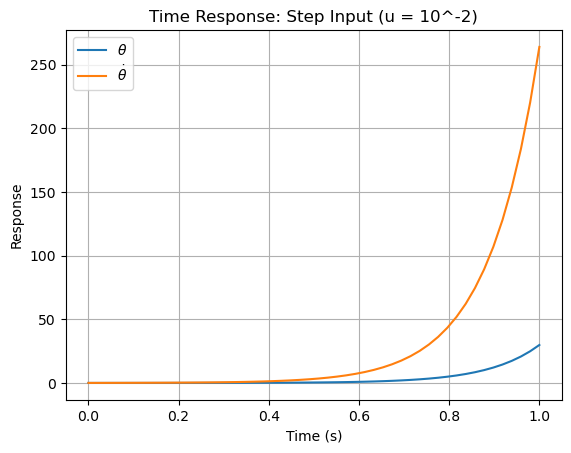

In [ ]:
plt.plot(t, y[:, 0], label=r"$\theta$")
plt.plot(t, y[:, 1], label=r"$\dot{\theta}$")
plt.title("Time Response: Step Input (u = 10^-2)")
plt.xlabel("Time (s)")
plt.ylabel("Response")
plt.legend()
plt.grid()

#### b) Null input, u = 0, and non-null initial conditions, x0 = [x01, x02]

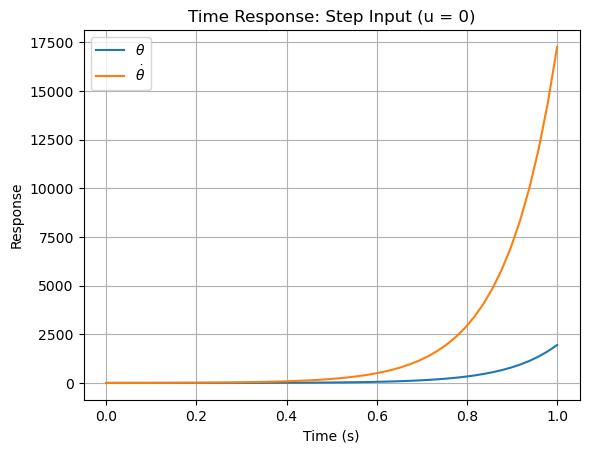

In [ ]:
t = np.linspace(0, 1, 50)
u = 0 * np.ones_like(t) # transformar u em matriz
x0 = [0.5, 0.5] # condicoes iniciais
D = np.zeros((2, 1))
system = StateSpace(A, B, C, D)

# lsim -> simulate output of a continuous-time linear system
time, y, x = lsim(system, u, t, X0=x0)

plt.plot(t, y[:, 0], label=r"$\theta$")
plt.plot(t, y[:, 1], label=r"$\dot{\theta}$")
plt.title("Time Response: Step Input (u = 0)")
plt.xlabel("Time (s)")
plt.ylabel("Response")
plt.legend()
plt.grid()